### Heroes Of Pymoli Data Analysis
* Of the 1163 active players, the vast majority are male (84%). There also exists, a smaller, but notable proportion of female players (14%).

* Our peak age demographic falls between 20-24 (44.8%) with secondary groups falling between 15-19 (18.60%) and 25-29 (13.4%).  
-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import os
from collections import Counter
from pandas import pivot_table,DataFrame,crosstab

# File to Load (Remember to Change These)
file_to_load = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
df = purchase_data
df.head(5)


,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


## Player Count

* Display the total number of players


In [3]:
df_Total_Players=df.groupby(['SN','Age','Gender']).size().reset_index().rename(columns={0:'count'})
Total_Players=len(df['SN'].unique())
print('Total Players: '+ str(Total_Players))
(df_Total_Players).head()
    

Total Players: 576


,SN,Age,Gender,count
0,Adairialis76,16,Male,1
1,Adastirin33,35,Female,1
2,Aeda94,17,Male,1
3,Aela59,21,Male,1
4,Aelaria33,23,Male,1


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [4]:
hdr={'Unique Items':str(len(df['Item ID'].unique())),
                        'Average Price':int(df['Price'].mean()*100)/100,
                        "No. Purchases":len(df['Purchase ID'].unique()),
                        "Total Revenue":df['Price'].sum()}
df_Item_List=df.groupby(['Item Name','Item ID','Price']).size().reset_index().rename(columns={0:'sales_qty'})
df_Item_List['TotalSale']= df_Item_List['Price']*df_Item_List['sales_qty'] 
df_Item_List.style.hide_index()
df_Item_List.head(5)


,Item Name,Item ID,Price,sales_qty,TotalSale
0,Abyssal Shard,162,2.67,5,13.35
1,"Aetherius, Boon of the Blessed",137,3.39,5,16.95
2,Agatha,120,3.08,6,18.48
3,Alpha,130,2.07,3,6.21
4,"Alpha, Oath of Zeal",79,4.05,3,12.15


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




                Gender  count  % Players
                Female     81      14.06
                  Male    484      84.03
 Other / Non-Disclosed     11       1.91




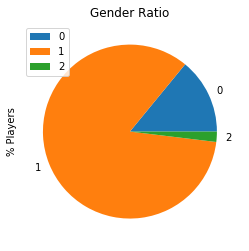

In [6]:
df_gen = df_Total_Players.groupby('Gender').size().reset_index().rename(columns={0:'count'})
df_gen['% Players']= round(df_gen['count']/Total_Players*100,2)
print(df_gen.to_string(index=False))
print()
print()
df_gen.set_index='Gender'
df_gen.drop_index='True'
df_gen.plot(kind='pie',y='% Players',x='Gender',title="Gender Ratio",legend='True')


## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [7]:
df_pvgender =pivot_table(df,index=['Gender'],values=['Price'] ,aggfunc=['count',np.sum,np.mean],margins=True)
(df_pvgender)

,count,sum,mean
,Price,Price,Price
Gender,,,
Female,113,361.94,3.203009
Male,652,1967.64,3.017853
Other / Non-Disclosed,15,50.19,3.346000
All,780,2379.77,3.050987


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


## Purchasing Analysis (Age)


 Grouped By Age Group


,Age Group,count
0,< 10,32
1,10-14,19
2,14-19,136
3,19-24,365
4,24-29,101
5,29-34,73
6,34-39,41
7,> 39,13


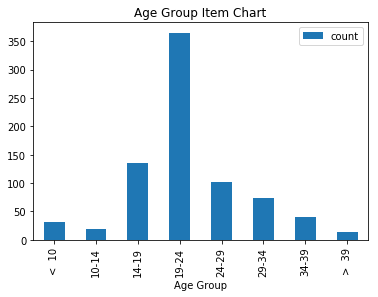

In [8]:

MAXAGE = df['Age'].max()

Agebins=[0,10,14,19,24,29,34,39,MAXAGE]
AgeLabels =["<  10","10-14","14-19","19-24","24-29","29-34","34-39",">  39"]
#creates a binned field with the range
dfcopy=df.copy()
dfcopy['Age Group']=pd.cut(x=df['Age'], bins=Agebins,labels=AgeLabels) 
#print(dfcopy.head())
print()

print(" Grouped By Age Group")
df_x_AgeGroup= (dfcopy.groupby(['Age Group']).size().reset_index().rename(columns={0:'count'}))

df_x_AgeGroup.plot(kind='bar',x='Age Group',y='count',title="Age Group Item Chart")
df_x_AgeGroup 





Grouped By AgeGroup, Gender
                   Gender Age Group  count
0                  Female     <  10      7
1                  Female     10-14      1
2                  Female     14-19     24
3                  Female     19-24     56
4                  Female     24-29     14
5                  Female     29-34      7
6                  Female     34-39      3
7                  Female     >  39      1
8                    Male     <  10     25
9                    Male     10-14     18
10                   Male     14-19    108
11                   Male     19-24    304
12                   Male     24-29     85
13                   Male     29-34     66
14                   Male     34-39     34
15                   Male     >  39     12
16  Other / Non-Disclosed     14-19      4
17  Other / Non-Disclosed     19-24      5
18  Other / Non-Disclosed     24-29      2
19  Other / Non-Disclosed     34-39      4



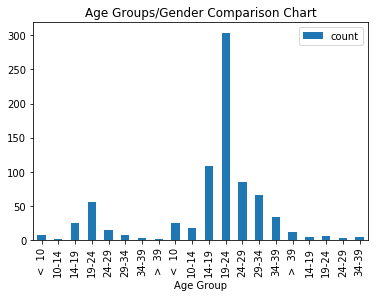

In [77]:
print()
print("Grouped By AgeGroup, Gender")
df_Age_x_Gender=dfcopy.groupby(['Age Group','Gender']).size().reset_index().rename(columns={0:'count'})
print(df_Age_x_Gender)
df_Age_x_Gender.plot(kind='bar', stacked=True,x ='Age Group',y='count',title="Age Groups/Gender Comparison Chart")
print()
#df_pvagebin =pivot_table(dfcopy,index='Age Group',values='Price',aggfunc=['count',np.sum,np.mean])
#print(df_pvagenin)
#dir(df_Age_x_Gender.plot)


* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [10]:
df.head() #to make sure it has not been corrupted

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [11]:
List_Reduced = list(zip(df['SN'],df['Price']))
df_Reduced=pd.DataFrame(List_Reduced)
df_Reduced.columns=['SN','TotalSale']

df_TopSpenders= df_Reduced.groupby('SN').sum().sort_values('TotalSale',ascending=False).head(20)
print()
print("Top 20 Clients")
print()
df_TopSpenders



Top 20 Clients



,TotalSale
SN,
Lisosia93,18.96
Idastidru52,15.45
Chamjask73,13.83
Iral74,13.62
Iskadarya95,13.10
Ilarin91,12.70
Ialallo29,11.84
Tyidaim51,11.83
Lassilsala30,11.51


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [119]:
df_Itemsgroup =(df.groupby(['Item Name']).size().reset_index().rename(columns={0:'count'}))
df_Itemsgroup.sort_values(by='count',ascending=False).head()

,Item Name,count
56,Final Critic,13
93,"Oathbreaker, Last Hope of the Breaking Storm",12
98,Persuasion,9
92,Nirvana,9
51,"Extraction, Quickblade Of Trembling Hands",9


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [118]:
df_SortList=df_Item_List.sort_values(by="TotalSale",ascending = False)
print(df_SortList.head())

                                        Item Name  Item ID  Price  sales_qty  \
95   Oathbreaker, Last Hope of the Breaking Storm      178   4.23         12   
94                                        Nirvana       82   4.90          9   
56                           Fiery Glass Crusader      145   4.58          9   
57                                   Final Critic       92   4.88          8   
128                                Singed Scalpel      103   4.35          8   

     TotalSale  
95       50.76  
94       44.10  
56       41.22  
57       39.04  
128      34.80  
